## Introduction

Basic model for recommender systems works with two kinds of data:
1. User-Item iteractions such as ratings (collaborative filtering models)
2. Attribute information about the users and items such as textual profiles or relevant keywords

## Collaborative filtering models 

Use the collaborative power of ratings provided by multiple users to make recommendations. The main challenge in designing collaborative filtering methods is that the underlying ratings matrices are sparse. <br>
The basic idea of collaborative filtering methods is that these unspecified ratings can be imputed because the observed ratins are often highly correlated across various users and items.<br>
Most of the collaborative filtering methods focuses on leveraging either inter-item correlations or inter-user correlations for the prediction process.

In this project, we will implement and analyze the performance of two types of collaborative filtering methods:
1. Neighborhood-based collaborative filtering
2. Model-based collaborative filtering

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple
from collections import defaultdict

from sklearn import metrics
from sklearn.metrics import auc, roc_curve, mean_squared_error

from surprise import Dataset
from surprise import Reader
from surprise import NMF
from surprise import SVD
from surprise import accuracy
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold



# 3. MovieLens dataset

In [2]:
rating_data = pd.read_csv('ml_small_latest_ratings.csv')
print(rating_data)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


In [3]:
users = rating_data['userId'].values
movies = rating_data['movieId'].values
ratings = rating_data['rating'].values
movie_set = set(movies)
user_set = set(users)

movieId_map_col = {} # key is the movieId, value is column index
def create_R(users, movies, ratings):
    user_num = len(user_set)
    movie_num = len(movie_set)

    for i in range(movie_num):
        movieId_map_col[list(movie_set)[i]] = i
        
    matrix_R = np.zeros((user_num, movie_num),dtype = float)
    for i in range(len(users)):
        matrix_R[users[i]-1][movieId_map_col[movies[i]]] = ratings[i]
    return matrix_R

matrix_R = create_R(users, movies, ratings)
print(matrix_R.shape)

(610, 9724)


# Question 1 

In [4]:
total_ratings = len(set(movies)) * len(set(users))
avaliable_ratings = len(ratings)
sparsity = avaliable_ratings / total_ratings
print("The Sparsicity of the Dataset:")
print(sparsity)

The Sparsicity of the Dataset:
0.016999683055613623


# Question 2


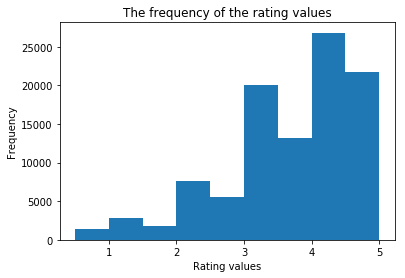

In [5]:
plt.hist(ratings, bins = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], align='mid')
plt.title("The frequency of the rating values")
plt.ylabel("Frequency")
plt.xlabel("Rating values")
plt.show()

# Question 3

Text(0.5, 0, 'Movie index')

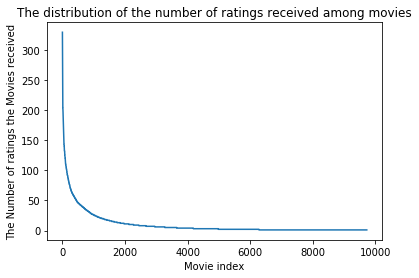

In [6]:
unique, counts = np.unique(movies, return_counts = True)
movie_count_dict = {}
for i in range(len(unique)):
    movie_count_dict[unique[i]] = counts[i]

movie_count_dict = sorted(movie_count_dict.items(), key = lambda item : item[1], reverse = True)  
# for movie_tuple in movie_count_dict:
#     plt.plt(movie_tuple[0])
plt.plot(range(len(movie_count_dict)), [movie_tuple[1] for movie_tuple in movie_count_dict])
plt.title('The distribution of the number of ratings received among movies')
plt.ylabel('The Number of ratings the Movies received')
plt.xlabel('Movie index')

#plt.show()

# Question 4

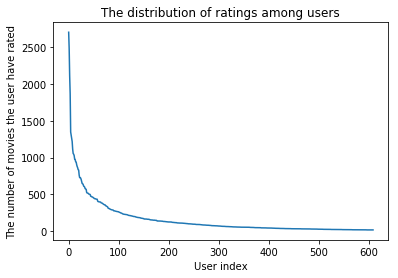

In [7]:
unique, counts = np.unique(users, return_counts = True)
users_count_dict = {}
for i in range(len(unique)):
    users_count_dict[unique[i]] = counts[i]

users_count_dict = sorted(users_count_dict.items(), key = lambda item : item[1], reverse = True)  
plt.plot(range(len(users_count_dict)), [users_tuple[1] for users_tuple in users_count_dict])
plt.title('The distribution of ratings among users')
plt.ylabel('The number of movies the user have rated')
plt.xlabel('User index')
plt.show()

# Question 6

max variance of the rating score: 5.062500
min variance of the rating score: 0.000000


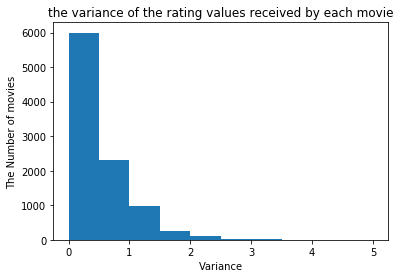

In [8]:
var_matrix = []

for i in range(matrix_R.shape[1]):
    valid = np.nonzero(matrix_R[:,i])  # i th col nonzero value
    var_matrix.append(np.var(matrix_R[valid,i]))

print("max variance of the rating score: %f" % max(var_matrix))
print("min variance of the rating score: %f" % min(var_matrix))

plt.hist(var_matrix, bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], align='mid')

plt.title("the variance of the rating values received by each movie")
plt.ylabel("The Number of movies")
plt.xlabel("Variance")

plt.show()

# 4. Neighborhood-based collaborative filtering

# Question 10&11

In [9]:
file_path = './ml_small_latest_ratings.csv'

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0.5, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

In [10]:
sim_options = {'name': 'pearson', 'user_based': True}
k = range(2, 102, 2)
rmse = []
mae = []


for i in k:
    result = cross_validate(KNNWithMeans(k=i, sim_options=sim_options), data, measures=['rmse', 'mae'], cv=10, verbose=False)
    rmse.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))
    print('\nk = %d\n' %i) 
    print('-' * 80)

with open('Q10_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)
with open('Q10_mae_data', 'wb') as fp:
    pickle.dump(mae, fp)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

k = 2

--------------------------------------------------------------------------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing simila

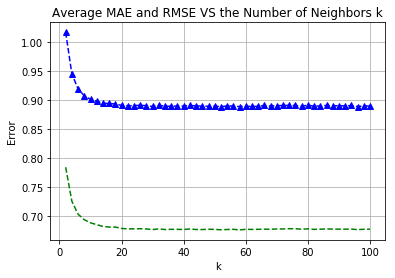

0.8890351772896293
0.6765784282462971
58
58


In [11]:
with open('Q10_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
with open('Q10_mae_data', 'rb') as fp:
    mae = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^', k, mae, 'g--')
ax.set(xlabel='k', ylabel='Error',
       title='Average MAE and RMSE VS the Number of Neighbors k')
fig.savefig("Average MAE and RMSE VS the Number of Neighbors k.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
min_mae=min(mae)
print(min_rmse)
print(min_mae)
print(k[rmse.index(min_rmse)])
print(k[mae.index(min_mae)])

In [12]:
kf = KFold(n_splits=10)
k = range(2, 102, 2)

rates = {} #{movieId:[ratings]}

for row in data.raw_ratings: #row: (userId, movieId, rating, Timestamp)
    #print(row)
    if row[1] not in rates:
        rates[row[1]] = []
    rates[row[1]].append(row[2])

var = {}
for key in rates:
    var[key] = np.var(rates[key])

# Question 12


In [13]:
pop_movie = [x for x in rates if len(rates[x]) > 2] #x: movieId (the key of rates)
rmse = []

for i in k:
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in pop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q12_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0294
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0062
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0116
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0200
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0062
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0334
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0149
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0059
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0071
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0074

k = 2, Average RMSE = 1.0142

---------------------------------------------------------------------

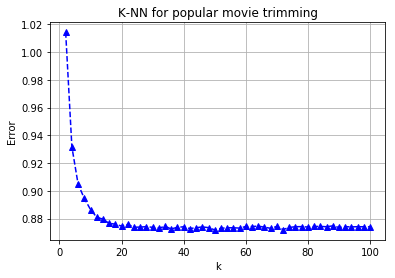

0.8718562533523411
50


In [14]:
with open('Q12_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='K-NN for popular movie trimming')
fig.savefig("K-NN for popular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 13

In [15]:
unpop_movie = [x for x in rates if len(rates[x]) <= 2]
rmse = []

for i in k:
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpop_movie]
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)  

with open('Q13_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0978
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1556
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1069
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1067
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1421
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2015
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1109
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1246
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0830
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0920

k = 2, Average RMSE = 1.1221

---------------------------------------------------------------------

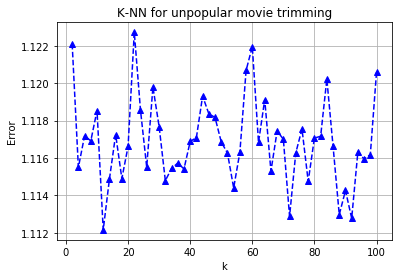

1.1121564891879863
12


In [16]:
with open('Q13_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)


fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='K-NN for unpopular movie trimming')
fig.savefig("K-NN for unpopular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 14

In [17]:
highvar_movie = [x for x in rates if len(rates[x]) >= 5 and var[x] >= 2]
rmse = []

for i in k:
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in highvar_movie]
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)  

with open('Q14_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)
    

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7954
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8103
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4863
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4271
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2708
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6944
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7274
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.1141
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3472
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2271

k = 2, Average RMSE = 1.5900

---------------------------------------------------------------------

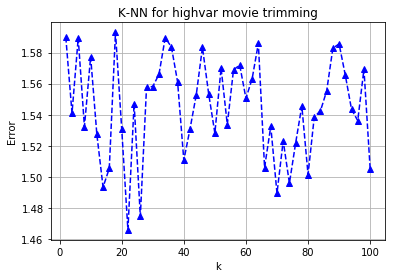

1.4657130295345326
22


In [18]:
with open('Q14_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='K-NN for highvar movie trimming')
fig.savefig("K-NN for highvar movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 15

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


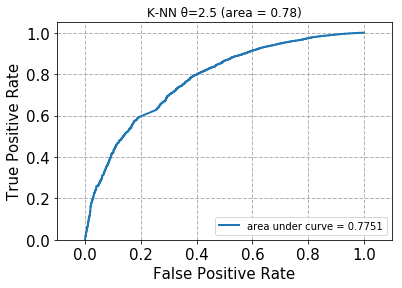

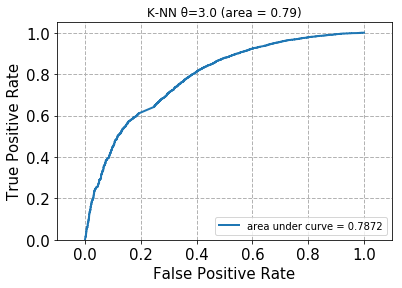

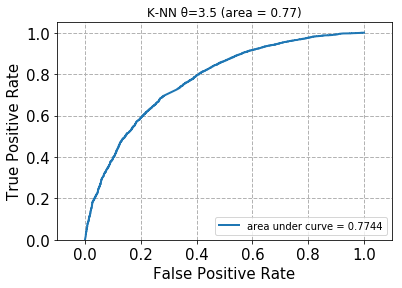

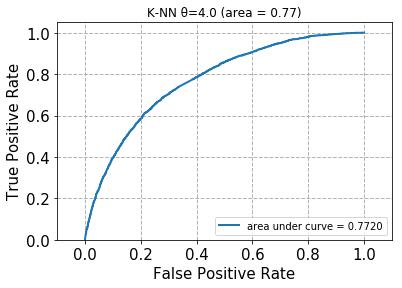

In [19]:
def plot_roc(fpr, tpr, name):
    fig, ax = plt.subplots()
    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title(name)
    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)


k_best = 30
threshold = [2.5, 3, 3.5, 4]

def threshold_plot(algo):
    for theta in threshold:

        df = pd.read_csv('./ml_small_latest_ratings.csv')

        reader = Reader(rating_scale=(0.5, 5))
        data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

        trainset, testset = train_test_split(data, test_size=.1)

        algo.fit(trainset)
        predictions = algo.test(testset) #predictions: (uid, iid, r_ui, est, details)

        trues = [0 if getattr(row, 'r_ui') < theta else 1 for row in predictions]
        scores = [getattr(row, 'est') for row in predictions]
        fpr, tpr, thresholds = metrics.roc_curve(trues, scores)
        roc_auc = metrics.auc(fpr, tpr)

        name = 'K-NN Î¸=%.1f (area = %0.2f)' % (theta, roc_auc)
        plot_roc(fpr,tpr,name)

        
algo = KNNWithMeans(k=k_best, sim_options=sim_options)
threshold_plot(algo)

# 5. Model-based collaborative filtering

# Question 17

In [20]:
k = range(2, 52, 2)
rmse = []
mae = []

for i in k:
    result = cross_validate(NMF(n_factors=i, biased=False), data, measures=['rmse', 'mae'], cv=10, verbose=False)
    rmse.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))
    print('\nk = %d\n' %i) 
    print('-' * 80)

with open('Q17_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)
with open('Q17_mae_data', 'wb') as fp:
    pickle.dump(mae, fp)


k = 2

--------------------------------------------------------------------------------

k = 4

--------------------------------------------------------------------------------

k = 6

--------------------------------------------------------------------------------

k = 8

--------------------------------------------------------------------------------

k = 10

--------------------------------------------------------------------------------

k = 12

--------------------------------------------------------------------------------

k = 14

--------------------------------------------------------------------------------

k = 16

--------------------------------------------------------------------------------

k = 18

--------------------------------------------------------------------------------

k = 20

--------------------------------------------------------------------------------

k = 22

--------------------------------------------------------------------------------

k = 24

-----

# Question 18

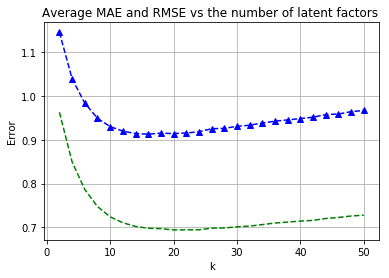

0.913040697176568
0.694307916627442
16
20


In [21]:
with open('Q17_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
with open('Q17_mae_data', 'rb') as fp:
    mae = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^', k, mae, 'g--')
ax.set(xlabel='k', ylabel='Error',
       title='Average MAE and RMSE vs the number of latent factors ')
fig.savefig("Q17 Average MAE and RMSE vs the number of latent factors.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
min_mae=min(mae)
print(min_rmse)
print(min_mae)
print(k[rmse.index(min_rmse)])
print(k[mae.index(min_mae)])

# Question 19

In [22]:
kf = KFold(n_splits=10)

rmse = []

for i in k:
    algo = NMF(n_factors=i, biased=False)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in pop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q19_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 1.1375
RMSE: 1.1390
RMSE: 1.1455
RMSE: 1.1398
RMSE: 1.1360
RMSE: 1.1405
RMSE: 1.1448
RMSE: 1.1357
RMSE: 1.1408
RMSE: 1.1360

k = 2, Average RMSE = 1.1396

--------------------------------------------------------------------------------
RMSE: 1.0194
RMSE: 1.0359
RMSE: 1.0269
RMSE: 1.0281
RMSE: 1.0202
RMSE: 1.0284
RMSE: 1.0261
RMSE: 1.0302
RMSE: 1.0292
RMSE: 1.0241

k = 4, Average RMSE = 1.0268

--------------------------------------------------------------------------------
RMSE: 0.9679
RMSE: 0.9658
RMSE: 0.9728
RMSE: 0.9803
RMSE: 0.9633
RMSE: 0.9662
RMSE: 0.9725
RMSE: 0.9664
RMSE: 0.9708
RMSE: 0.9695

k = 6, Average RMSE = 0.9695

--------------------------------------------------------------------------------
RMSE: 0.9277
RMSE: 0.9343
RMSE: 0.9328
RMSE: 0.9252
RMSE: 0.9262
RMSE: 0.9367
RMSE: 0.9429
RMSE: 0.9360
RMSE: 0.9172
RMSE: 0.9317

k = 8, Average RMSE = 0.9311

--------------------------------------------------------------------------------
RMSE: 0.9182
RMSE: 0.9097
RMSE: 

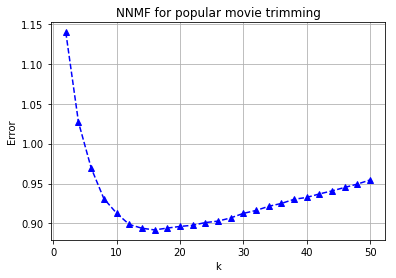

0.8918601126353872
16


In [23]:
with open('Q19_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
k = range(2, 52, 2)
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='NNMF for popular movie trimming')
fig.savefig("Q19 NNMF for popular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 20

In [24]:
rmse = []

for i in k:
    algo = NMF(n_factors=i, biased=False)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)
           
with open('Q20_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 1.2632
RMSE: 1.2060
RMSE: 1.1834
RMSE: 1.2775
RMSE: 1.2771
RMSE: 1.2330
RMSE: 1.2169
RMSE: 1.1947
RMSE: 1.2011
RMSE: 1.2805

k = 2, Average RMSE = 1.2334

--------------------------------------------------------------------------------
RMSE: 1.2754
RMSE: 1.1752
RMSE: 1.2119
RMSE: 1.2242
RMSE: 1.2222
RMSE: 1.1819
RMSE: 1.2102
RMSE: 1.2614
RMSE: 1.1994
RMSE: 1.3186

k = 4, Average RMSE = 1.2281

--------------------------------------------------------------------------------
RMSE: 1.1888
RMSE: 1.2080
RMSE: 1.2526
RMSE: 1.1680
RMSE: 1.2098
RMSE: 1.2060
RMSE: 1.2482
RMSE: 1.2389
RMSE: 1.2314
RMSE: 1.2094

k = 6, Average RMSE = 1.2161

--------------------------------------------------------------------------------
RMSE: 1.1882
RMSE: 1.2284
RMSE: 1.2066
RMSE: 1.2440
RMSE: 1.2274
RMSE: 1.1955
RMSE: 1.1300
RMSE: 1.2097
RMSE: 1.2083
RMSE: 1.2253

k = 8, Average RMSE = 1.2063

--------------------------------------------------------------------------------
RMSE: 1.2916
RMSE: 1.1642
RMSE: 

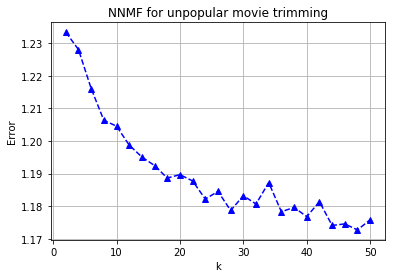

1.1727187859747024
48


In [25]:
with open('Q20_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='NNMF for unpopular movie trimming')
fig.savefig("Q20 NNMF for unpopular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 21

In [26]:
rmse = []
for i in k:
    algo = NMF(n_factors=i, biased=False)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in highvar_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80) 

with open('Q21_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 1.9217
RMSE: 1.8387
RMSE: 1.4465
RMSE: 1.5680
RMSE: 1.9869
RMSE: 1.6022
RMSE: 1.8551
RMSE: 1.7971
RMSE: 1.6541
RMSE: 1.2248

k = 2, Average RMSE = 1.6895

--------------------------------------------------------------------------------
RMSE: 1.3633
RMSE: 1.5099
RMSE: 1.9969
RMSE: 1.6694
RMSE: 1.9483
RMSE: 1.7090
RMSE: 1.9353
RMSE: 1.5298
RMSE: 1.6894
RMSE: 1.6291

k = 4, Average RMSE = 1.6980

--------------------------------------------------------------------------------
RMSE: 1.7213
RMSE: 1.7431
RMSE: 1.6369
RMSE: 1.6858
RMSE: 1.8619
RMSE: 1.6161
RMSE: 1.7180
RMSE: 1.7800
RMSE: 1.6804
RMSE: 1.8255

k = 6, Average RMSE = 1.7269

--------------------------------------------------------------------------------
RMSE: 1.4598
RMSE: 1.4252
RMSE: 1.7530
RMSE: 1.2836
RMSE: 1.6521
RMSE: 1.9370
RMSE: 1.8390
RMSE: 1.8949
RMSE: 1.5305
RMSE: 2.1888

k = 8, Average RMSE = 1.6964

--------------------------------------------------------------------------------
RMSE: 1.6549
RMSE: 1.7106
RMSE: 

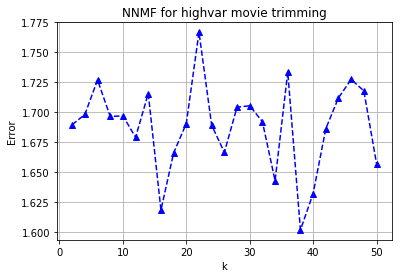

1.6016060881980123
38


In [27]:
with open('Q21_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='NNMF for highvar movie trimming')
fig.savefig("Q21 NNMF for highvar movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 22

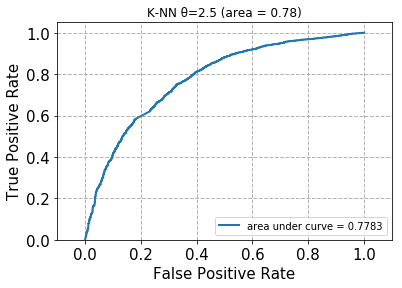

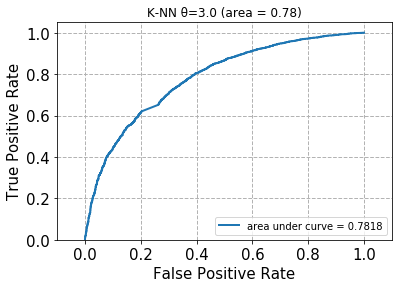

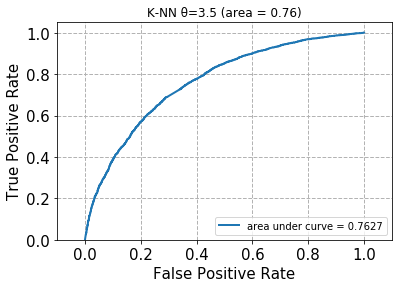

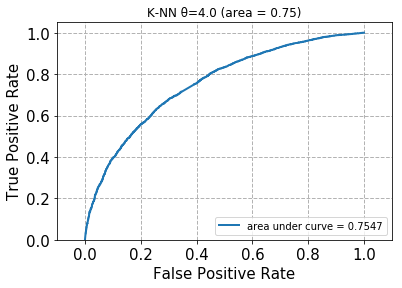

In [28]:
n_factors_best = 18
algo = NMF(n_factors=n_factors_best, biased=False)
threshold_plot(algo)

# Question 23

In [1]:
trainset = data.build_full_trainset()
model = NMF(n_factors=20, n_epochs=20, biased=False)
model.fit(trainset)
U = model.pu
V = model.qi
# print(U.shape)
# print(V.shape)

all_movies = pd.read_csv('./ml_small_latest_movies.csv') 
all_moviesId = all_movies['movieId'] #unique, no duplicates
all_moviesId_map_index = {} #the mapping in movies.csv: key is actual movie id, value is index id(0,1,2...)

for i in range(len(all_moviesId)):
    all_moviesId_map_index[list(all_moviesId)[i]] = i

columns20 = []
for i in range(20): #column i of V
    column = V[:,i]
    sorted_column = -np.sort(-column) #desc
    #print(sorted_column)
    movie_ids = [0]*10 #store top 10 movie index ids in column j
    movie_genres = []
    for j in range(10):
        movie_ids[j] = list(column).index(sorted_column[j]) 
        for m_id, index in movieId_map_col.items(): #get key(movie_id) from value(index_id)
            if index == movie_ids[j]:
                actual_movie_id = m_id
                mapped_id = all_moviesId_map_index[actual_movie_id]
        movie_genres.append(all_movies['genres'][mapped_id])
    columns20.append(movie_genres)
    
for column_i in columns20:
    for k in range(10):
        print(column_i[k])
    print('\n')

NameError: name 'data' is not defined

# Question 24

In [ ]:
k = range(2, 52, 2)
rmse = []
mae = []

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0.5, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

for i in k:
    result = cross_validate(SVD(n_factors=i), data, measures=['rmse', 'mae'], cv=10, verbose=False)
    rmse.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))
    print('\nk = %d\n' %i) 
#     print('-' * 80)

with open('Q24_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)
with open('Q24_mae_data', 'wb') as fp:
    pickle.dump(mae, fp)

# Qustion 25

In [ ]:
with open('Q24_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
with open('Q24_mae_data', 'rb') as fp:
    mae = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^', k, mae, 'g--')
ax.set(xlabel='k', ylabel='Error',
       title='Average MAE and RMSE vs the number of latent factors SVD with bias')
fig.savefig("Q24 Average MAE and RMSE vs the number of latent factors SVD with bias.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
min_mae=min(mae)
print(min_rmse)
print(min_mae)
print(k[rmse.index(min_rmse)])
print(k[mae.index(min_mae)])

# Question 26

In [ ]:
# Design a MF with bias collaborative filter 
# to predict the ratings of the movies in the popular movie 
kf = KFold(n_splits=10)
k = range(2, 52, 2)
rmse = []

for i in k:
    algo = SVD(n_factors=i)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in pop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q26_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

In [ ]:
with open('Q26_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='MF for popular movie trimming')
fig.savefig("Q26 MF for popular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 27

In [ ]:
# Design a MF with bias collaborative filter 
# to predict the ratings of the movies in the popular movie 
kf = KFold(n_splits=10)
k = range(2, 52, 2)
rmse = []

for i in k:
    algo = SVD(n_factors=i)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q27_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

In [ ]:
with open('Q27_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='MF for unpopular movie trimming')
fig.savefig("Q27 MF for unpopular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 28

In [ ]:
# Design a MF with bias collaborative filter 
# to predict the ratings of the movies in the popular movie 
kf = KFold(n_splits=10)
k = range(2, 52, 2)
rmse = []

for i in k:
    algo = SVD(n_factors=i)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in highvar_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q28_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

In [ ]:
with open('Q28_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='MF for high variance movie trimming')
fig.savefig("Q28 MF for high variance movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 29

In [ ]:
n_factors_best = 30
algo = SVD(n_factors=n_factors_best)
threshold_plot(algo)

# 6.Naive collaborative filtering

# Question 30

In [ ]:
kf = KFold(n_splits=10) # kf has been generated before

rmse_naive = []
user_num = len(set(users))
available_ratings = len(ratings)
index = 0;
naive_rate = []
for i in range(user_num):
    score_naive = [];
    while (users[index]==i+1):
        score_naive.append(ratings[index])
        index += 1
        if (index == available_ratings):
            break
   
    naive_rate.append(np.mean(score_naive))


In [ ]:
rmse_naive = []
kf = KFold(n_splits=10) # kf has been generated before
for train_index, test_index in kf.split(data):
    y_true = []
    y_false = []
    for i in range(len(test_index)):
        y_true.append(test_index[i][2])
        y_false.append(naive_rate[(int(test_index[i][0]) - 1)])
    rmse_naive.append(np.sqrt(metrics.mean_squared_error(y_true,y_false)))
mean_rmse_naive = np.mean(rmse_naive)  
print(mean_rmse_naive)

# Question 31

In [ ]:
rates = {} #{movieId:[ratings]}
for row in data.raw_ratings: #row: (userId, movieId, rating, Timestamp)
    if row[1] not in rates:
        rates[row[1]] = []
    rates[row[1]].append(row[2])
var = {}
for key in rates:
    var[key] = np.var(rates[key])

In [ ]:
pop_movie = [x for x in rates if len(rates[x]) > 2]
rmse_pop_naive = []
for train_index, test_index in kf.split(data):
    y_true = []
    y_false = []
    for i in range(len(test_index)):
        if (test_index[i][1] in pop_movie):
            y_true.append(test_index[i][2])
            y_false.append(naive_rate[(int(test_index[i][0]) - 1)])
    rmse_pop_naive.append(np.sqrt(metrics.mean_squared_error(y_true,y_false)))
    
mean_rmse_pop_naive = np.mean(rmse_pop_naive)  
print(mean_rmse_pop_naive)

# Question 32

In [ ]:
unpop_movie = [x for x in rates if len(rates[x]) <= 2]

rmse_unpop_naive = []
for train_index, test_index in kf.split(data):
    y_true = []
    y_false = []
    for i in range(len(test_index)):
        if (test_index[i][1] in unpop_movie):
            y_true.append(test_index[i][2])
            y_false.append(naive_rate[(int(test_index[i][0]) - 1)])
    rmse_unpop_naive.append(np.sqrt(metrics.mean_squared_error(y_true,y_false)))
    
mean_rmse_unpop_naive = np.mean(rmse_unpop_naive)  
print(mean_rmse_unpop_naive)

# Question 33

In [ ]:
highvar_movie = [x for x in rates if len(rates[x]) >= 5 and var[x] >= 2]

rmse_highvar_naive = []
for train_index, test_index in kf.split(data):
    y_true = []
    y_false = []
    for i in range(len(test_index)):
        if (test_index[i][1] in highvar_movie):
            y_true.append(test_index[i][2])
            y_false.append(naive_rate[(int(test_index[i][0]) - 1)])
    rmse_highvar_naive.append(np.sqrt(metrics.mean_squared_error(y_true,y_false)))
    
mean_rmse_highvar_naive = np.mean(rmse_highvar_naive)  
print(mean_rmse_highvar_naive)

# Question 34

In [ ]:
def plot_roc_t3(fpr_KNN, tpr_KNN, fpr_NMF, tpr_NMF, fpr_SVD, tpr_SVD, name):
    fig, ax = plt.subplots()
    roc_auc_KNN = metrics.auc(fpr_KNN,tpr_KNN)
    roc_auc_NMF = metrics.auc(fpr_NMF,tpr_NMF)
    roc_auc_SVD = metrics.auc(fpr_SVD,tpr_SVD)

    ax.plot(fpr_KNN, tpr_KNN, lw=2, label= 'KNN: area under curve = %0.4f' % roc_auc_KNN)
    ax.plot(fpr_NMF, tpr_NMF, lw=2, label= 'NMF: area under curve = %0.4f' % roc_auc_NMF)
    ax.plot(fpr_SVD, tpr_SVD, lw=2, label= 'SVD: area under curve = %0.4f' % roc_auc_SVD)
    
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title(name)
    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [ ]:
threshold_compare = 3
k_best_KNN = 30
sim_options = {'name': 'pearson', 'user_based': True}
k_best_NMF = 18
k_best_SVD = 30

algo_KNN = KNNWithMeans(k=k_best_KNN, sim_options=sim_options)
algo_NMF = NMF(n_factors=k_best_NMF, biased=False)
algo_SVD = SVD(n_factors=k_best_SVD)

def ROC_helper(algo):
    df = pd.read_csv('./ml_small_latest_ratings.csv')
    reader = Reader(rating_scale=(0.5, 5))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=.1)
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    trues = [0 if getattr(row, 'r_ui') < threshold_compare else 1 for row in predictions]
    scores = [getattr(row, 'est') for row in predictions]
    fpr, tpr, thresholds = metrics.roc_curve(trues, scores)
    return fpr, tpr
fpr_KNN, tpr_KNN = ROC_helper(algo_KNN)
fpr_NMF, tpr_NMF = ROC_helper(algo_NMF)
fpr_SVD, tpr_SVD = ROC_helper(algo_SVD)
   
plot_roc_t3(fpr_KNN, tpr_KNN, fpr_NMF, tpr_NMF, fpr_SVD, tpr_SVD,"ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters")


# Question 35

In [ ]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

# Question 36

In [ ]:
threshold_compare = 3
def algorithm_precision_recall(algo):
    avg_precision = []
    avg_recall = []
    t_range = range(1, 26, 1)
    for t in t_range:
        reader = Reader(line_format='user item rating', sep=',', rating_scale=(0.5, 5), skip_lines=1)
        data = Dataset.load_from_file(file_path, reader=reader)
        kf = KFold(n_splits=10)
        
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            predictions = algo.test(testset)
            precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=threshold_compare)

        avg_precision.append(np.array(list(precisions.values())).mean())
        avg_recall.append(np.array(list(recalls.values())).mean())
        
    return avg_precision, avg_recall

In [ ]:
k_best_KNN = 30
sim_options = {'name': 'pearson', 'user_based': True}
algo_KNN = KNNWithMeans(k=k_best_KNN, sim_options=sim_options)

p_knn, r_knn = algorithm_precision_recall(algo_KNN)
with open('Q36_precision_data', 'wb') as fp:
    pickle.dump(p_knn, fp)
with open('Q36_recall_data', 'wb') as fp:
    pickle.dump(r_knn, fp)


In [ ]:
with open('Q36_precision_data', 'rb') as fp:
    p_knn = pickle.load(fp)
with open('Q36_recall_data', 'rb') as fp:
    r_knn = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_knn)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('KNN: Average Precision v.s. t')
plt.show()

t_range = range(1, 26, 1)
plt.plot(t_range, r_knn)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('KNN: Average Recall v.s. t')
plt.show()

In [ ]:
plt.plot(r_knn, p_knn)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('KNN: Average Precision v.s. Average Recall')
plt.show()

# Question 37

In [ ]:
k_best_NMF = 18
algo_NMF = NMF(n_factors=k_best_NMF, biased=False)
p_nmf, r_nmf = algorithm_precision_recall(algo_NMF)

with open('Q37_precision_data', 'wb') as fp:
    pickle.dump(p_nmf, fp)
with open('Q37_recall_data', 'wb') as fp:
    pickle.dump(r_nmf, fp)

In [ ]:
with open('Q37_precision_data', 'rb') as fp:
    p_nmf = pickle.load(fp)
with open('Q37_recall_data', 'rb') as fp:
    r_nmf = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_nmf)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('NNMF: Average Precision v.s. t')
plt.show()

t_range = range(1, 26, 1)
plt.plot(t_range, r_nmf)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('NNMF: Average Recall v.s. t')
plt.show()

In [ ]:
plt.plot(r_nmf, p_nmf)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('NNMF: Average Precision v.s. Average Recall')
plt.show()

# Question 38

In [ ]:
k_best_SVD = 30
algo_SVD = SVD(n_factors=k_best_SVD)
p_svd, r_svd = algorithm_precision_recall(algo_SVD)
with open('Q38_precision_data', 'wb') as fp:
    pickle.dump(p_svd, fp)
with open('Q38_recall_data', 'wb') as fp:
    pickle.dump(r_svd, fp)

In [ ]:
with open('Q38_precision_data', 'rb') as fp:
    p_svd = pickle.load(fp)
with open('Q38_recall_data', 'rb') as fp:
    r_svd = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_svd)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('MF: Average Precision v.s. t')
plt.show()

plt.plot(t_range, r_svd)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('MF: Average Recall v.s. t')
plt.show()

In [ ]:
plt.plot(r_svd, p_svd)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('MF: Average Precision v.s. Average Recall')
plt.show()

# Question 39

In [ ]:
with open('Q36_precision_data', 'rb') as fp:
    p_knn = pickle.load(fp)
with open('Q36_recall_data', 'rb') as fp:
    r_knn = pickle.load(fp)
with open('Q37_precision_data', 'rb') as fp:
    p_nmf = pickle.load(fp)
with open('Q37_recall_data', 'rb') as fp:
    r_nmf = pickle.load(fp)
with open('Q38_precision_data', 'rb') as fp:
    p_svd = pickle.load(fp)
with open('Q38_recall_data', 'rb') as fp:
    r_svd = pickle.load(fp)
    
plt.plot(r_knn, p_knn, label = 'kNN')
plt.plot(r_nmf, p_nmf, label = 'NNMF')
plt.plot(r_svd, p_svd, label = 'MF')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('Average Precision v.s. Average Recall')
plt.ylim(0.85,1)
plt.legend()
plt.show()

In [ ]:
t_range = range(1, 26, 1)
plt.plot(t_range, p_knn, 'C0', label = 'k-NN precision')
plt.plot(t_range, r_knn, 'C0--', label = 'k-NN recall')
plt.plot(t_range, p_nmf, 'C1', label = 'NNMF precision')
plt.plot(t_range, r_nmf, 'C1--', label = 'NNMF recall')
plt.plot(t_range, p_svd, 'C2', label = 'MF precision')
plt.plot(t_range, r_svd, 'C2--', label = 'MF recall')

plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('Average Precisions/ Average Recalls v.s. t')
plt.legend()
plt.show()